In [2]:
import pandas as pd

# CSV ÌååÏùº ÏùΩÍ∏∞
df_energy = pd.read_csv('ÌïúÍµ≠ÎÇ®ÎèôÎ∞úÏ†Ñ_ÏãúÍ∞ÑÎåÄÎ≥Ñ_ÌíçÎ†•_Î∞úÏ†ÑÏã§Ï†Å_ÏµúÏ¢Ö_ÏßÑÏßúÏµúÏ¢Ö.csv')
df_energy.tail()

Î∞úÏ†ÑÍµ¨Î∂Ñ  Ìò∏Í∏∞          ÏùºÏûê  ÏãúÍ∞Ñ    Î∞úÏ†ÑÎüâ(kWh)  ÏÑ§ÎπÑÏö©Îüâ(MW)  Ïó∞Ïãù(ÎÖÑ)
102907  Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•   1  2022-05-01  20  374.664714      1.65    1.9
102908  Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•   1  2022-05-01  21  865.034571      1.65    1.9
102909  Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•   1  2022-05-01  22  845.750429      1.65    1.9
102910  Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•   1  2022-05-01  23  563.374429      1.65    1.9
102911  Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•   1  2022-05-01  24  535.825571      1.65    1.9

### EDA

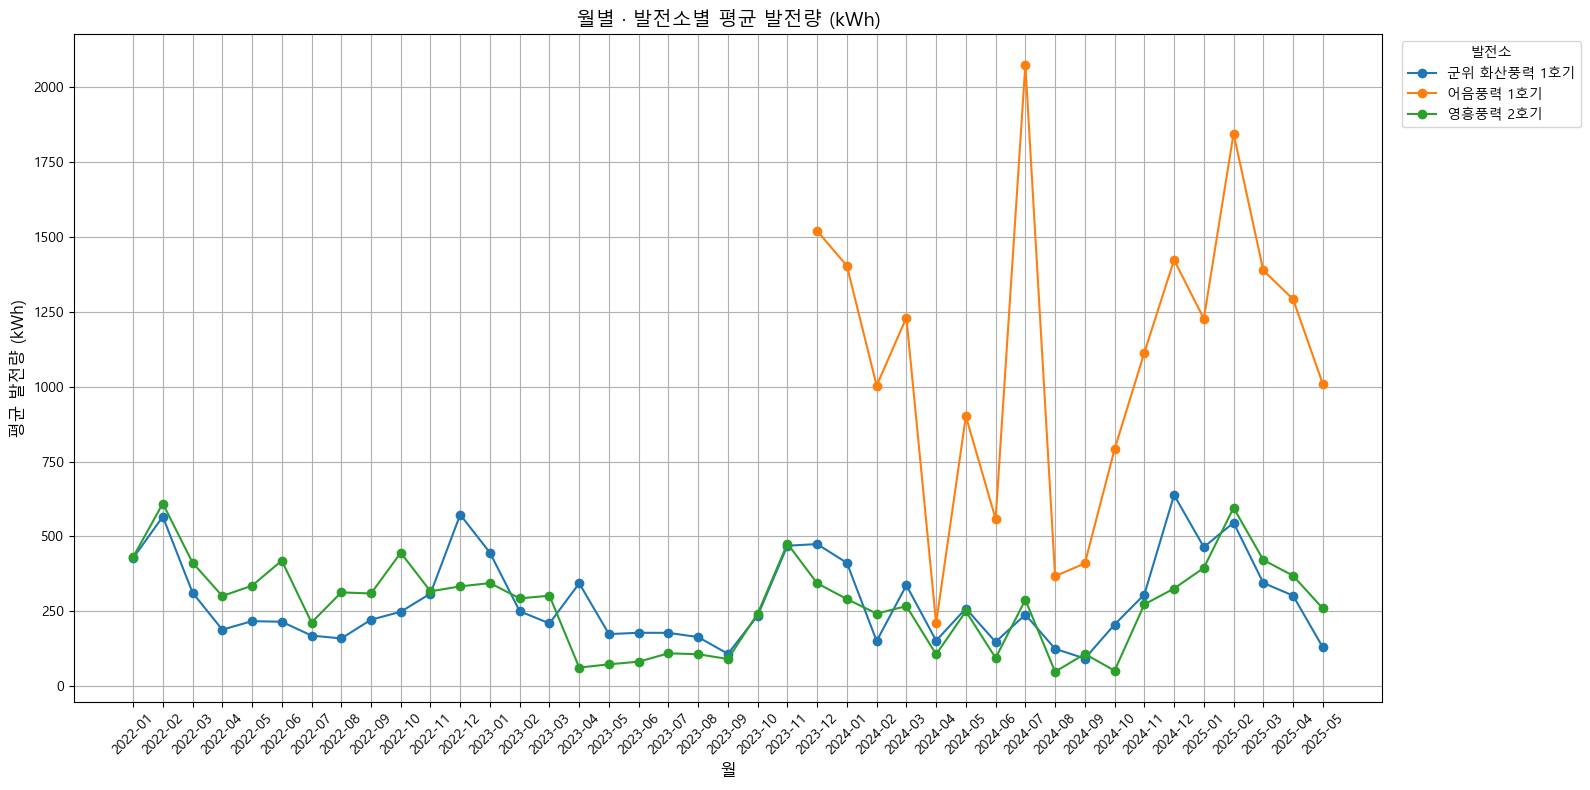

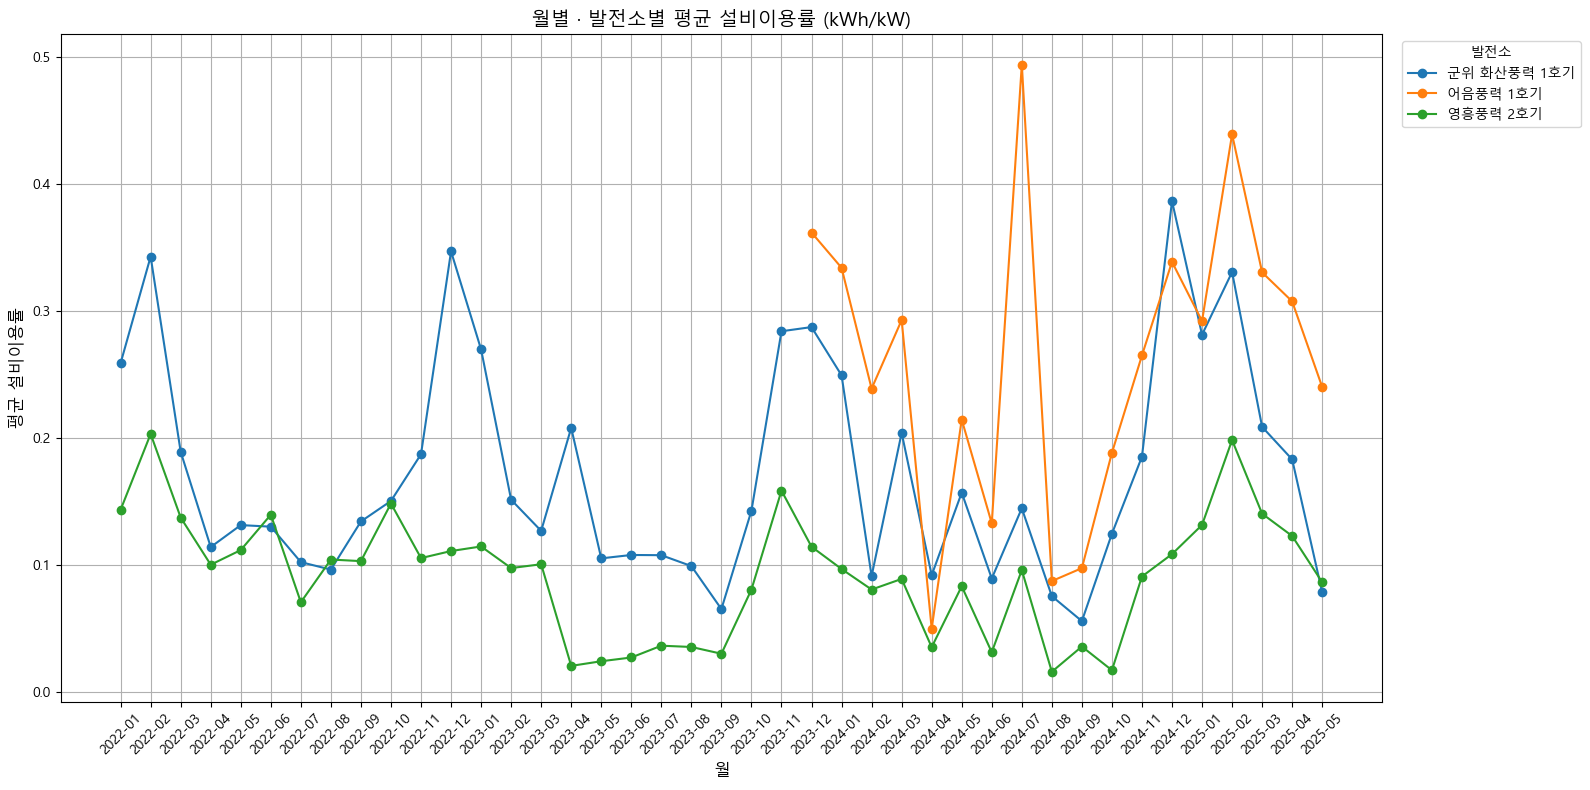

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import platform

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

# ‚úÖ 1. CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
file_path = 'ÌïúÍµ≠ÎÇ®ÎèôÎ∞úÏ†Ñ_ÏãúÍ∞ÑÎåÄÎ≥Ñ_ÌíçÎ†•_Î∞úÏ†ÑÏã§Ï†Å_ÏµúÏ¢Ö_ÏßÑÏßúÏµúÏ¢Ö.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')
# ‚úÖ 'ÏÇºÏ≤úÌè¨ÌíçÎ†•' Ï†úÏô∏
df = df[df['Î∞úÏ†ÑÍµ¨Î∂Ñ'] != 'ÏÇºÏ≤úÌè¨ÌíçÎ†•']


# ‚úÖ 2. ÎÇ†Ïßú Î≥ÄÌôò Î∞è Ïõî Ïª¨Îüº ÏÉùÏÑ±
df['ÏùºÏûê'] = pd.to_datetime(df['ÏùºÏûê'])
df['Ïõî'] = df['ÏùºÏûê'].dt.to_period('M')

# ‚úÖ 3. Î∞úÏ†ÑÏÜå Ïª¨Îüº ÏÉùÏÑ±
df['Î∞úÏ†ÑÏÜå'] = df['Î∞úÏ†ÑÍµ¨Î∂Ñ'].astype(str) + ' ' + df['Ìò∏Í∏∞'].astype(str) + 'Ìò∏Í∏∞'

# ‚úÖ 4. Î∞úÏ†ÑÎüâ Í∏∞Î∞ò ÏõîÎ≥Ñ ÌèâÍ∑†
monthly_avg = df.groupby(['Ïõî', 'Î∞úÏ†ÑÏÜå'])['Î∞úÏ†ÑÎüâ(kWh)'].mean().reset_index()

# ‚úÖ 5. ÏÑ§ÎπÑÏù¥Ïö©Î•† Í≥ÑÏÇ∞ (kWh / (MW * 1000))
df['ÏÑ§ÎπÑÏù¥Ïö©Î•†'] = df['Î∞úÏ†ÑÎüâ(kWh)'] / (df['ÏÑ§ÎπÑÏö©Îüâ(MW)'] * 1000)
monthly_util = df.groupby(['Ïõî', 'Î∞úÏ†ÑÏÜå'])['ÏÑ§ÎπÑÏù¥Ïö©Î•†'].mean().reset_index()

# ‚úÖ 6. Í∑∏ÎûòÌîÑ 1: ÏõîÎ≥Ñ ¬∑ Î∞úÏ†ÑÏÜåÎ≥Ñ ÌèâÍ∑† Î∞úÏ†ÑÎüâ
plt.figure(figsize=(16, 8))
for name, group in monthly_avg.groupby('Î∞úÏ†ÑÏÜå'):
    plt.plot(group['Ïõî'].astype(str), group['Î∞úÏ†ÑÎüâ(kWh)'], marker='o', label=name)

plt.title('ÏõîÎ≥Ñ ¬∑ Î∞úÏ†ÑÏÜåÎ≥Ñ ÌèâÍ∑† Î∞úÏ†ÑÎüâ (kWh)', fontsize=14)
plt.xlabel('Ïõî', fontsize=12)
plt.ylabel('ÌèâÍ∑† Î∞úÏ†ÑÎüâ (kWh)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Î∞úÏ†ÑÏÜå', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ‚úÖ 7. Í∑∏ÎûòÌîÑ 2: ÏõîÎ≥Ñ ¬∑ Î∞úÏ†ÑÏÜåÎ≥Ñ ÌèâÍ∑† ÏÑ§ÎπÑÏù¥Ïö©Î•†
plt.figure(figsize=(16, 8))
for name, group in monthly_util.groupby('Î∞úÏ†ÑÏÜå'):
    plt.plot(group['Ïõî'].astype(str), group['ÏÑ§ÎπÑÏù¥Ïö©Î•†'], marker='o', label=name)

plt.title('ÏõîÎ≥Ñ ¬∑ Î∞úÏ†ÑÏÜåÎ≥Ñ ÌèâÍ∑† ÏÑ§ÎπÑÏù¥Ïö©Î•† (kWh/kW)', fontsize=14)
plt.xlabel('Ïõî', fontsize=12)
plt.ylabel('ÌèâÍ∑† ÏÑ§ÎπÑÏù¥Ïö©Î•†', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Î∞úÏ†ÑÏÜå', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [6]:
# ‚úÖ Îëê Í∑∏ÎûòÌîÑÎ•º ÌïòÎÇòÏùò Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÄÏû•
fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# ‚ñ∂ Í∑∏ÎûòÌîÑ 1: Î∞úÏ†ÑÎüâ
for name, group in monthly_avg.groupby('Î∞úÏ†ÑÏÜå'):
    axes[0].plot(group['Ïõî'].astype(str), group['Î∞úÏ†ÑÎüâ(kWh)'], marker='o', label=name)

axes[0].set_title('ÏõîÎ≥Ñ ¬∑ Î∞úÏ†ÑÏÜåÎ≥Ñ ÌèâÍ∑† Î∞úÏ†ÑÎüâ (kWh)', fontsize=14)
axes[0].set_xlabel('Ïõî', fontsize=12)
axes[0].set_ylabel('ÌèâÍ∑† Î∞úÏ†ÑÎüâ (kWh)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)
axes[0].legend(title='Î∞úÏ†ÑÏÜå', bbox_to_anchor=(1.01, 1), loc='upper left')

# ‚ñ∂ Í∑∏ÎûòÌîÑ 2: ÏÑ§ÎπÑÏù¥Ïö©Î•†
for name, group in monthly_util.groupby('Î∞úÏ†ÑÏÜå'):
    axes[1].plot(group['Ïõî'].astype(str), group['ÏÑ§ÎπÑÏù¥Ïö©Î•†'], marker='o', label=name)

axes[1].set_title('ÏõîÎ≥Ñ ¬∑ Î∞úÏ†ÑÏÜåÎ≥Ñ ÌèâÍ∑† ÏÑ§ÎπÑÏù¥Ïö©Î•† (kWh/kW)', fontsize=14)
axes[1].set_xlabel('Ïõî', fontsize=12)
axes[1].set_ylabel('ÌèâÍ∑† ÏÑ§ÎπÑÏù¥Ïö©Î•†', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)
axes[1].legend(title='Î∞úÏ†ÑÏÜå', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout()
plt.savefig('wind_Î∞úÏ†ÑÎüâ+ÏÑ§ÎπÑÏù¥Ïö©Î•†.png', dpi=300)
plt.close()


### Í∏∞ÏÉÅÏ≤≠ API Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [5]:
import requests
import ssl
from requests.adapters import HTTPAdapter
from urllib3.poolmanager import PoolManager

class SSLAdapter(HTTPAdapter):
    def __init__(self, ssl_context=None, **kwargs):
        self.ssl_context = ssl_context
        super().__init__(**kwargs)

    def init_poolmanager(self, *args, **kwargs):
        kwargs['ssl_context'] = self.ssl_context
        return super().init_poolmanager(*args, **kwargs)

# TLS 1.2 Ïù¥ÏÉÅÏùò context Í∞ïÏ†ú ÏÑ§Ï†ï
context = ssl.create_default_context()
context.set_ciphers('DEFAULT@SECLEVEL=1')  # ÎÇÆÏùÄ Î≥¥Ïïà Î†àÎ≤® ÌóàÏö©Ìï† Í≤ΩÏö∞

session = requests.Session()
session.mount('https://', SSLAdapter(context))

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
url = "http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst"
params = {
    "serviceKey": "zJLFmDMckurk+au32kOHTxsrU5gG2NAadNE68xYaBW8PBJtdXN7F4QEpuW6f68GL0qLcMQsmgyPHxbOs43NCBA==",
    "numOfRows": "1000",
    "pageNo": "1",
    "dataType": "JSON",
    "base_date": "20250627",
    "base_time": "0500",
    "nx": "55",
    "ny": "127"
}
response = session.get(url, params=params)
print(response.json())


{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'}, 'body': {'dataType': 'JSON', 'items': {'item': [{'baseDate': '20250627', 'baseTime': '0500', 'category': 'TMP', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '20', 'nx': 55, 'ny': 127}, {'baseDate': '20250627', 'baseTime': '0500', 'category': 'UUU', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '0.1', 'nx': 55, 'ny': 127}, {'baseDate': '20250627', 'baseTime': '0500', 'category': 'VVV', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '0.4', 'nx': 55, 'ny': 127}, {'baseDate': '20250627', 'baseTime': '0500', 'category': 'VEC', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '194', 'nx': 55, 'ny': 127}, {'baseDate': '20250627', 'baseTime': '0500', 'category': 'WSD', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '0.4', 'nx': 55, 'ny': 127}, {'baseDate': '20250627', 'baseTime': '0500', 'category': 'SKY', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '4', 

In [6]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# ----------------------------------------------------------------------
# 1. API Ìò∏Ï∂úÏùÑ ÏúÑÌïú Í∏∞Î≥∏ ÏÑ§Ï†ï
# ----------------------------------------------------------------------

now = datetime.now()
if now.hour < 5:
    base_date = (now - timedelta(days=1)).strftime('%Y%m%d')
else:
    base_date = now.strftime('%Y%m%d')

url = "http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst"
serviceKey = "zJLFmDMckurk+au32kOHTxsrU5gG2NAadNE68xYaBW8PBJtdXN7F4QEpuW6f68GL0qLcMQsmgyPHxbOs43NCBA=="  # Î≥∏Ïù∏Ïùò ÏÑúÎπÑÏä§ ÌÇ§Î°ú Î≥ÄÍ≤ΩÌïòÏÑ∏Ïöî

# ----------------------------------------------------------------------
# 2. Î∞òÎ≥µÎ¨∏ÏùÑ ÏÇ¨Ïö©Ìï¥ Î™®Îì† ÌéòÏù¥ÏßÄÏùò Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
# ----------------------------------------------------------------------

all_items = []
page_no = 1
num_of_rows = 5000

print("Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")

while True:
    print(f" - {page_no} ÌéòÏù¥ÏßÄ Îç∞Ïù¥ÌÑ∞ ÏöîÏ≤≠ Ï§ë...")
    
    params = {
        'serviceKey': serviceKey,
        'numOfRows': str(num_of_rows),
        'pageNo': str(page_no),
        'dataType': 'JSON',
        'base_date': base_date,
        'base_time': '0500',
        'nx': '55',
        'ny': '127'
    }

    try:
        response = requests.get(url, params=params, timeout=10)
        response.raise_for_status()

        data = response.json()
        
        if data['response']['header']['resultCode'] != '00':
            print(f"‚ùå API ÏóêÎü¨ ÏùëÎãµ: {data['response']['header']['resultMsg']}")
            break

        items = data['response']['body']['items'].get('item', [])
        all_items.extend(items)

        if len(items) < num_of_rows:
            print(f"ÎßàÏßÄÎßâ ÌéòÏù¥ÏßÄ({page_no})ÏûÖÎãàÎã§. Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏùÑ ÏôÑÎ£åÌï©ÎãàÎã§.")
            break

        page_no += 1

    except requests.exceptions.RequestException as e:
        print(f"‚ùå ÎÑ§Ìä∏ÏõåÌÅ¨ ÎòêÎäî HTTP ÏóêÎü¨ Î∞úÏÉù: {e}")
        break
    except requests.exceptions.JSONDecodeError:
        print("‚ùå JSON ÌååÏã± ÏóêÎü¨: ÏÑúÎ≤Ñ ÏùëÎãµÏù¥ Ïú†Ìö®Ìïú JSONÏù¥ ÏïÑÎãôÎãàÎã§.")
        print(f"--- ÏÑúÎ≤Ñ Ïã§Ï†ú ÏùëÎãµ (Status: {response.status_code}) ---")
        print(response.text)
        break
    except KeyError:
        print("‚ùå Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÏóêÎü¨: ÏùëÎãµ Î∞õÏùÄ JSONÏùò ÌÇ§Í∞Ä ÏòàÏÉÅÍ≥º Îã§Î¶ÖÎãàÎã§.")
        print("--- ÏÑúÎ≤Ñ Ïã§Ï†ú ÏùëÎãµ ---")
        print(data)
        break

# ----------------------------------------------------------------------
# 3. ÏàòÏßëÎêú Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º Ìëú(DataFrame)Î°ú Î≥ÄÌôò Î∞è Ï∂úÎ†•
# ----------------------------------------------------------------------

if all_items:
    df = pd.DataFrame(all_items)
    df.drop_duplicates(inplace=True)
    
    print(f"\nÏ¥ù {len(df)}Í∞úÏùò Ïú†ÎãàÌÅ¨Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌñàÏäµÎãàÎã§. ÌëúÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.")

    # fcstDateÏôÄ fcstTimeÏùÑ Ïù∏Îç±Ïä§Î°ú ÏßÄÏ†ïÌïòÏó¨ pivot_table ÏÉùÏÑ±
    pivot_df = df.pivot_table(
        index=['fcstDate', 'fcstTime'], 
        columns='category', 
        values='fcstValue', 
        aggfunc='first'
    ).reset_index()

    desired_order = ['fcstDate', 'fcstTime', 'TMP', 'SKY', 'PTY', 'POP', 'PCP', 'REH', 'WSD', 'SNO']
    current_columns = [col for col in desired_order if col in pivot_df.columns]
    remaining_columns = [col for col in pivot_df.columns if col not in current_columns]
    pivot_df = pivot_df[current_columns + remaining_columns]

    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)

    print("\n--- Í∏∞ÏÉÅÏ≤≠ Îã®Í∏∞ÏòàÎ≥¥ (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞, ÎÇ†Ïßú Ìè¨Ìï®) ---")
    print(pivot_df)
else:
    print("\nÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§. ÏÑúÎπÑÏä§ ÌÇ§ ÎòêÎäî ÏöîÏ≤≠ ÌååÎùºÎØ∏ÌÑ∞Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")


Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
 - 1 ÌéòÏù¥ÏßÄ Îç∞Ïù¥ÌÑ∞ ÏöîÏ≤≠ Ï§ë...
ÎßàÏßÄÎßâ ÌéòÏù¥ÏßÄ(1)ÏûÖÎãàÎã§. Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏùÑ ÏôÑÎ£åÌï©ÎãàÎã§.

Ï¥ù 907Í∞úÏùò Ïú†ÎãàÌÅ¨Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌñàÏäµÎãàÎã§. ÌëúÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.

--- Í∏∞ÏÉÅÏ≤≠ Îã®Í∏∞ÏòàÎ≥¥ (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞, ÎÇ†Ïßú Ìè¨Ìï®) ---
category  fcstDate fcstTime TMP SKY PTY POP     PCP  REH  WSD   SNO   TMN   TMX   UUU  VEC   VVV   WAV
0         20250627     0600  20   4   0  30    Í∞ïÏàòÏóÜÏùå   95  0.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.1  194   0.4  -999
1         20250627     0700  20   4   0  30    Í∞ïÏàòÏóÜÏùå   90  0.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.8  270     0  -999
2         20250627     0800  21   4   0  30    Í∞ïÏàòÏóÜÏùå   90  0.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.2   23  -0.7  -999
3         20250627     0900  22   4   0  30    Í∞ïÏàòÏóÜÏùå   85  1.5  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.3   16  -1.4  -999
4         20250627     1000  23   4   0  30    Í∞ïÏàòÏóÜÏùå   85  2.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.9   57  -1.3  -999
5  

In [7]:
pivot_df

category  fcstDate fcstTime TMP SKY PTY POP     PCP  REH  WSD   SNO   TMN   TMX   UUU  VEC   VVV   WAV
0         20250627     0600  20   4   0  30    Í∞ïÏàòÏóÜÏùå   95  0.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.1  194   0.4  -999
1         20250627     0700  20   4   0  30    Í∞ïÏàòÏóÜÏùå   90  0.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.8  270     0  -999
2         20250627     0800  21   4   0  30    Í∞ïÏàòÏóÜÏùå   90  0.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.2   23  -0.7  -999
3         20250627     0900  22   4   0  30    Í∞ïÏàòÏóÜÏùå   85  1.5  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.3   16  -1.4  -999
4         20250627     1000  23   4   0  30    Í∞ïÏàòÏóÜÏùå   85  2.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.9   57  -1.3  -999
5         20250627     1100  23   4   0  30    Í∞ïÏàòÏóÜÏùå   85  2.9  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.4   59  -1.5  -999
6         20250627     1200  24   4   0  30    Í∞ïÏàòÏóÜÏùå   85  3.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.8   58  -1.8  -999
7         20250627     1300  25   4   0  30    Í∞ïÏàòÏóÜÏùå   80  2.3  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.1   70  -0.8  -999
8         20250627     1400  25   4   0  30    Í∞ïÏàòÏóÜÏùå   80  3.3  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -3.2   83  -0.4  -999
9         20250627     1500  26   4   0  30    Í∞ïÏàòÏóÜÏùå   80  2.9  Ï†ÅÏÑ§ÏóÜÏùå   NaN  27.0  -2.8   86  -0.2  -999
10        20250627     1600  26   4   0  30    Í∞ïÏàòÏóÜÏùå   80  4.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -3.5  118   1.9  -999
11        20250627     1700  27   4   0  30    Í∞ïÏàòÏóÜÏùå   75  3.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.8  112   1.2  -999
12        20250627     1800  26   4   0  30    Í∞ïÏàòÏóÜÏùå   75  2.3  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.2   90     0  -999
13        20250627     1900  26   3   0  20    Í∞ïÏàòÏóÜÏùå   80  2.2  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.1   90     0  -999
14        20250627     2000  25   3   0  20    Í∞ïÏàòÏóÜÏùå   90  2.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN    -2   93   0.1  -999
15        20250627     2100  24   3   0  20    Í∞ïÏàòÏóÜÏùå   95    2  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.9   90     0  -999
16        20250627     2200  23   3   0  20    Í∞ïÏàòÏóÜÏùå   95  1.9  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.8   99   0.3  -999
17        20250627     2300  23   4   0  30    Í∞ïÏàòÏóÜÏùå   95  2.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.9  104   0.5  -999
18        20250628     0000  23   4   0  30    Í∞ïÏàòÏóÜÏùå   95  2.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.8  113   0.8  -999
19        20250628     0100  23   4   0  30    Í∞ïÏàòÏóÜÏùå   95  1.5  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.3  106   0.4  -999
20        20250628     0200  22   4   0  30    Í∞ïÏàòÏóÜÏùå   95  1.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.3   98   0.2  -999
21        20250628     0300  22   4   0  30    Í∞ïÏàòÏóÜÏùå   95  1.2  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.6  145     1  -999
22        20250628     0400  22   4   0  30    Í∞ïÏàòÏóÜÏùå   95  1.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.3  163   1.3  -999
23        20250628     0500  22   4   0  30    Í∞ïÏàòÏóÜÏùå   95  2.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.6  197     2  -999
24        20250628     0600  22   4   0  30    Í∞ïÏàòÏóÜÏùå  100  2.1  Ï†ÅÏÑ§ÏóÜÏùå  22.0   NaN   0.9  205   1.9  -999
25        20250628     0700  23   4   1  60   2.0mm   95  1.9  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.7  201   1.8  -999
26        20250628     0800  23   4   1  60   2.0mm   95    2  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN     0  180     2  -999
27        20250628     0900  23   4   1  60   3.0mm   95  2.3  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN     0  178   2.3  -999
28        20250628     1000  23   4   1  60   3.0mm   95  2.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.1  182   2.4  -999
29        20250628     1100  24   4   0  30    Í∞ïÏàòÏóÜÏùå   90  2.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.4  189   2.4  -999
30        20250628     1200  25   4   0  30    Í∞ïÏàòÏóÜÏùå   90  2.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.6  193   2.7  -999
31        20250628     1300  26   4   0  30    Í∞ïÏàòÏóÜÏùå   90    3  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.9  197   2.9  -999
32        20250628     1400  26   4   0  30    Í∞ïÏàòÏóÜÏùå   85  2.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   1.4  210   2.4  -999
33

<span style="font-size:12px">

## üå¶ Í∏∞ÏÉÅÏ≤≠ ÏòàÎ≥¥ Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº ÏÑ§Î™Ö

| Ïª¨ÎüºÎ™Ö | ÏùòÎØ∏ | Îã®ÏúÑ ÎòêÎäî Í∞í |
|--------|------|---------------|
| `fcstDate` | ÏòàÎ≥¥ ÎÇ†Ïßú | Ïòà: `20250627` ‚Üí 2025ÎÖÑ 6Ïõî 27Ïùº |
| `fcstTime` | ÏòàÎ≥¥ ÏãúÍ∞Å | Ïòà: `0600` ‚Üí Ïò§Ï†Ñ 6Ïãú |
| `TMP` | Í∏∞Ïò® | ‚ÑÉ (ÏÑ≠Ïî® Ïò®ÎèÑ) |
| `SKY` | ÌïòÎäò ÏÉÅÌÉú | 1: ÎßëÏùå, 3: Íµ¨Î¶Ñ ÎßéÏùå, 4: ÌùêÎ¶º |
| `PTY` | Í∞ïÏàò ÌòïÌÉú | 0: ÏóÜÏùå, 1: ÎπÑ, 2: ÎπÑ/Îàà, 3: Îàà, 4: ÏÜåÎÇòÍ∏∞ Îì± |
| `POP` | Í∞ïÏàò ÌôïÎ•† | % |
| `PCP` | 1ÏãúÍ∞Ñ Í∞ïÏàòÎüâ | mm ÎòêÎäî `"Í∞ïÏàòÏóÜÏùå"` |
| `REH` | ÏäµÎèÑ | % |
| `WSD` | ÌíçÏÜç | m/s (ÎØ∏ÌÑ∞/Ï¥à) |
| `SNO` | 1ÏãúÍ∞Ñ Ï†ÅÏÑ§Îüâ | cm ÎòêÎäî `"Ï†ÅÏÑ§ÏóÜÏùå"` |
| `TMN` | Ïùº ÏµúÏ†ÄÍ∏∞Ïò® | ‚ÑÉ (Ìï¥Îãπ ÎÇ†Ïßú Ï†ÑÏ≤¥Ïùò ÏµúÏ†Ä ÏòàÏÉÅ Í∏∞Ïò®) |
| `TMX` | Ïùº ÏµúÍ≥†Í∏∞Ïò® | ‚ÑÉ (Ìï¥Îãπ ÎÇ†Ïßú Ï†ÑÏ≤¥Ïùò ÏµúÍ≥† ÏòàÏÉÅ Í∏∞Ïò®) |
| `UUU` | ÎèôÏÑú Î∞îÎûå ÏÑ±Î∂Ñ | m/s (ÏùåÏàò: ÏÑúÌíç, ÏñëÏàò: ÎèôÌíç) |
| `VVV` | ÎÇ®Î∂Å Î∞îÎûå ÏÑ±Î∂Ñ | m/s (ÏùåÏàò: Î∂ÅÌíç, ÏñëÏàò: ÎÇ®Ìíç) |
| `VEC` | ÌíçÌñ• | ÎèÑ (¬∞), 0: Î∂Å, 90: Îèô, 180: ÎÇ®, 270: ÏÑú |
| `WAV` | ÌååÍ≥† (Ìï¥ÏÉÅÏö©) | m (Ïú°ÏÉÅ ÏòàÎ≥¥ÏóêÏÑúÎäî -999Î°ú Î¨¥Ìö® Í∞í Ï≤òÎ¶¨Îê®) |

---

## üí° Ï∂îÍ∞Ä ÏÑ§Î™Ö

- `UUU`, `VVV`Îäî Î∞îÎûåÏùò Î≤°ÌÑ∞ ÏÑ±Î∂ÑÏûÖÎãàÎã§.  
  ‚Üí ÌíçÏÜç(`WSD`)Í≥º ÌíçÌñ•(`VEC`)ÏúºÎ°úÎ∂ÄÌÑ∞ Í≥ÑÏÇ∞ Í∞ÄÎä•  
  ‚Üí `ÌíçÏÜç^2 = UUU^2 + VVV^2`, `ÌíçÌñ• = atan2(UUU, VVV)`

- `TMX`, `TMN`ÏùÄ ÌïòÎ£®Ïóê Ìïú Î≤àÎßå ÎÇòÌÉÄÎÇòÎ©∞, Í∑∏ ÎÇ† Ï†ÑÏ≤¥Î•º ÎåÄÌëúÌïòÎäî ÏòàÎ≥¥ÏûÖÎãàÎã§.

- `PCP`, `SNO`Îäî `"Í∞ïÏàòÏóÜÏùå"`, `"Ï†ÅÏÑ§ÏóÜÏùå"`Ï≤òÎüº Î¨∏ÏûêÏó¥Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏñ¥ ÏàòÏπò Î∂ÑÏÑù Ïãú Ï≤òÎ¶¨ ÌïÑÏöîÌï©ÎãàÎã§.

- `WAV`Îäî Ìï¥Ïñë ÏòàÎ≥¥ Ï†ÑÏö© Ìï≠Î™©Ïù¥Î©∞, Ïú°ÏÉÅÏóêÏÑúÎäî ÎåÄÎ∂ÄÎ∂Ñ `-999`Î°ú ÎÇòÌÉÄÎÇòÎ©∞ Î¨¥ÏãúÌï¥ÎèÑ Î¨¥Î∞©Ìï©ÎãàÎã§.


### Í∏∞ÏÉÅÏ≤≠ API Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [8]:
pivot_df.head(5)

category  fcstDate fcstTime TMP SKY PTY POP   PCP REH  WSD   SNO  TMN  TMX   UUU  VEC   VVV   WAV
0         20250627     0600  20   4   0  30  Í∞ïÏàòÏóÜÏùå  95  0.4  Ï†ÅÏÑ§ÏóÜÏùå  NaN  NaN   0.1  194   0.4  -999
1         20250627     0700  20   4   0  30  Í∞ïÏàòÏóÜÏùå  90  0.8  Ï†ÅÏÑ§ÏóÜÏùå  NaN  NaN   0.8  270     0  -999
2         20250627     0800  21   4   0  30  Í∞ïÏàòÏóÜÏùå  90  0.8  Ï†ÅÏÑ§ÏóÜÏùå  NaN  NaN  -0.2   23  -0.7  -999
3         20250627     0900  22   4   0  30  Í∞ïÏàòÏóÜÏùå  85  1.5  Ï†ÅÏÑ§ÏóÜÏùå  NaN  NaN  -0.3   16  -1.4  -999
4         20250627     1000  23   4   0  30  Í∞ïÏàòÏóÜÏùå  85  2.4  Ï†ÅÏÑ§ÏóÜÏùå  NaN  NaN  -1.9   57  -1.3  -999

In [9]:
# Ï†úÍ±∞Ìï† Ïª¨Îüº Î¶¨Ïä§Ìä∏
drop_columns = ['TMN', 'TMX', 'WAV', 'UUU', 'VVV', 'PTY', 'POP']

# Ïª¨ÎüºÏù¥ Ï°¥Ïû¨Ìï† Í≤ΩÏö∞ÏóêÎßå ÏÇ≠Ï†úÌïòÎèÑÎ°ù Ï≤òÎ¶¨
pivot_df = pivot_df.drop(columns=[col for col in drop_columns if col in pivot_df.columns])


In [10]:
# Ïª¨ÎüºÎ™Ö Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨ (SKY Ï∂îÍ∞ÄÎê®)
rename_dict = {
    'fcstDate': 'ÏùºÏûê',
    'fcstTime': 'ÏãúÍ∞Ñ',
    'TMP': 'Í∏∞Ïò®(¬∞C)',
    'PCP': 'Í∞ïÏàòÎüâ(mm)',
    'REH': 'ÏäµÎèÑ(%)',
    'WSD': 'ÌíçÏÜç(m/s)',
    'SNO': 'Ï†ÅÏÑ§(cm)',
    'VEC': 'ÌíçÌñ•(16Î∞©ÏúÑ)',
    'SKY': 'ÌïòÎäòÏÉÅÌÉú',
}

# Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
pivot_df = pivot_df.rename(columns=rename_dict)



In [11]:
# ÏùºÏûê Î≥ÄÌôò ('YYYYMMDD' ÌòïÏãùÏù∏ Í≤ΩÏö∞ÏóêÎßå Î≥ÄÌôò)
if pivot_df['ÏùºÏûê'].dtype == object and pivot_df['ÏùºÏûê'].str.match(r'^\d{8}$').all():
    pivot_df['ÏùºÏûê'] = pd.to_datetime(pivot_df['ÏùºÏûê'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

# ÏãúÍ∞Ñ Î≥ÄÌôò ('HHMM' Î¨∏ÏûêÏó¥ ÌòïÏãùÏù∏ Í≤ΩÏö∞ÏóêÎßå Î≥ÄÌôò)
if pivot_df['ÏãúÍ∞Ñ'].dtype == object and pivot_df['ÏãúÍ∞Ñ'].str.match(r'^\d{4}$').all():
    pivot_df['ÏãúÍ∞Ñ'] = pivot_df['ÏãúÍ∞Ñ'].astype(str).str[:2].astype(int)


In [12]:
import re

def clean_precip(val):
    # NaNÏù¥Î©¥ Í∑∏ÎåÄÎ°ú Î∞òÌôò
    if pd.isna(val):
        return val
    val = str(val)
    
    # Í∞ïÏàòÏóÜÏùå, Ï†ÅÏÑ§ÏóÜÏùå ‚Üí 0
    if 'ÏóÜÏùå' in val:
        return 0.0
    
    # 1mm ÎØ∏Îßå ‚Üí Í¥ÄÎ°ÄÏ†ÅÏúºÎ°ú 0.5Î°ú Ï≤òÎ¶¨ÌïòÍ±∞ÎÇò 0.0ÏúºÎ°ú Ï≤òÎ¶¨ Í∞ÄÎä•
    if 'ÎØ∏Îßå' in val:
        return 0.5  # ÎòêÎäî 0.0ÏúºÎ°ú Î∞îÍøîÎèÑ Îê®
    
    # Ïà´ÏûêÎßå Ï∂îÏ∂ú (Ïòà: '2.5mm' ‚Üí 2.5)
    numeric_part = re.findall(r"[\d.]+", val)
    return float(numeric_part[0]) if numeric_part else 0.0

# Ï†ÅÏö©
pivot_df['Í∞ïÏàòÎüâ(mm)'] = pivot_df['Í∞ïÏàòÎüâ(mm)'].apply(clean_precip)
pivot_df['Ï†ÅÏÑ§(cm)'] = pivot_df['Ï†ÅÏÑ§(cm)'].apply(clean_precip)


In [13]:
pivot_df.head(5)

category          ÏùºÏûê  ÏãúÍ∞Ñ Í∏∞Ïò®(¬∞C) ÌïòÎäòÏÉÅÌÉú  Í∞ïÏàòÎüâ(mm) ÏäµÎèÑ(%) ÌíçÏÜç(m/s)  Ï†ÅÏÑ§(cm) ÌíçÌñ•(16Î∞©ÏúÑ)
0         2025-06-27   6     20    4      0.0    95     0.4     0.0      194
1         2025-06-27   7     20    4      0.0    90     0.8     0.0      270
2         2025-06-27   8     21    4      0.0    90     0.8     0.0       23
3         2025-06-27   9     22    4      0.0    85     1.5     0.0       16
4         2025-06-27  10     23    4      0.0    85     2.4     0.0       57

### Í∏∞ÏÉÅÏ≤≠ csv Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [7]:
df_weather = pd.read_csv('weather_merged_final.csv')

df_weather.head(5)

ÏßÄÏ†ê ÏßÄÏ†êÎ™Ö                ÏùºÏãú  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  \
0  90  ÏÜçÏ¥à  2022-01-01 01:00    -7.7      NaN      1.5     270.0   32.0   
1  90  ÏÜçÏ¥à  2022-01-01 02:00    -8.0      NaN      1.9     270.0   32.0   
2  90  ÏÜçÏ¥à  2022-01-01 03:00    -8.3      NaN      1.3     270.0   34.0   
3  90  ÏÜçÏ¥à  2022-01-01 04:00    -8.2      NaN      1.5     270.0   33.0   
4  90  ÏÜçÏ¥à  2022-01-01 05:00    -8.1      NaN      1.6     270.0   32.0   

   ÌòÑÏßÄÍ∏∞Ïïï(hPa)  ÏùºÏÇ¨(MJ/m2)  Ï†ÅÏÑ§(cm)  Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)  
0     1026.6        NaN    22.1        1.0  
1     1027.2        NaN    22.1        1.0  
2     1027.8        NaN    22.1        1.0  
3     1027.4        NaN    22.1        2.0  
4     1026.9        NaN    22.1        1.0

In [8]:
# Ï†úÍ±∞Ìï† Ïª¨Îüº Î¶¨Ïä§Ìä∏
drop_columns = ['ÏßÄÏ†ê', 'ÌòÑÏßÄÍ∏∞Ïïï(hPa)', 'ÏùºÏÇ¨(MJ/m2)']

# Ïª¨ÎüºÏù¥ Ï°¥Ïû¨Ìï† Í≤ΩÏö∞ÏóêÎßå ÏÇ≠Ï†úÌïòÎèÑÎ°ù Ï≤òÎ¶¨
df_weather = df_weather.drop(columns=[col for col in drop_columns if col in df_weather.columns])
df_weather.head(5)

ÏßÄÏ†êÎ™Ö                ÏùºÏãú  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  Ï†ÅÏÑ§(cm)  \
0  ÏÜçÏ¥à  2022-01-01 01:00    -7.7      NaN      1.5     270.0   32.0    22.1   
1  ÏÜçÏ¥à  2022-01-01 02:00    -8.0      NaN      1.9     270.0   32.0    22.1   
2  ÏÜçÏ¥à  2022-01-01 03:00    -8.3      NaN      1.3     270.0   34.0    22.1   
3  ÏÜçÏ¥à  2022-01-01 04:00    -8.2      NaN      1.5     270.0   33.0    22.1   
4  ÏÜçÏ¥à  2022-01-01 05:00    -8.1      NaN      1.6     270.0   32.0    22.1   

   Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)  
0        1.0  
1        1.0  
2        1.0  
3        2.0  
4        1.0

In [9]:
# datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df_weather['ÏùºÏãú'] = pd.to_datetime(df_weather['ÏùºÏãú'])

# ÏùºÏûê, ÏãúÍ∞Ñ Ïª¨Îüº ÏÉùÏÑ±
df_weather['ÏùºÏûê'] = df_weather['ÏùºÏãú'].dt.strftime('%Y-%m-%d')
df_weather['ÏãúÍ∞Ñ'] = df_weather['ÏùºÏãú'].dt.hour

# Ï°∞Í±¥: ÏãúÍ∞ÑÏù¥ 0Ïù¥Î©¥
mask = df_weather['ÏãúÍ∞Ñ'] == 0

# ÏãúÍ∞Ñ 0ÏùÑ 24Î°ú Î∞îÍæ∏Í≥†, ÏùºÏûêÎäî ÌïòÎ£® Ï†ÑÏúºÎ°ú Î≥ÄÍ≤Ω
df_weather.loc[mask, 'ÏãúÍ∞Ñ'] = 24
df_weather.loc[mask, 'ÏùºÏûê'] = (df_weather.loc[mask, 'ÏùºÏãú'] - pd.Timedelta(days=1)).dt.strftime('%Y-%m-%d')

# Í∏∞Ï°¥ 'ÏùºÏãú' Ïª¨Îüº ÏÇ≠Ï†ú
df_weather = df_weather.drop(columns=['ÏùºÏãú'])

# ÌôïÏù∏
df_weather.head(5)


ÏßÄÏ†êÎ™Ö  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  Ï†ÅÏÑ§(cm)  Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)  \
0  ÏÜçÏ¥à    -7.7      NaN      1.5     270.0   32.0    22.1        1.0   
1  ÏÜçÏ¥à    -8.0      NaN      1.9     270.0   32.0    22.1        1.0   
2  ÏÜçÏ¥à    -8.3      NaN      1.3     270.0   34.0    22.1        1.0   
3  ÏÜçÏ¥à    -8.2      NaN      1.5     270.0   33.0    22.1        2.0   
4  ÏÜçÏ¥à    -8.1      NaN      1.6     270.0   32.0    22.1        1.0   

           ÏùºÏûê  ÏãúÍ∞Ñ  
0  2022-01-01   1  
1  2022-01-01   2  
2  2022-01-01   3  
3  2022-01-01   4  
4  2022-01-01   5

In [10]:
# ÌòÑÏû¨ Ïª¨ÎüºÎì§ ÌôïÏù∏
cols = df_weather.columns.tolist()

# Í∏∞Ï§ÄÏù¥ ÎêòÎäî Ïª¨Îüº Ïù¥Î¶Ñ (Ïòà: 'ÏßÄÏ†ê' ÎòêÎäî 'ÏßÄÏ†êÎ™Ö')
key_col = 'ÏßÄÏ†êÎ™Ö'  # ÎòêÎäî 'ÏßÄÏ†ê'ÏúºÎ°ú Î∞îÍøîÎèÑ Îê®

# 'ÏßÄÏ†êÎ™Ö' Îã§ÏùåÏóê 'ÏùºÏûê', 'ÏãúÍ∞Ñ'ÏùÑ ÏÇΩÏûÖ
if key_col in cols:
    idx = cols.index(key_col)
    # Í∏∞Ï°¥Ïóê 'ÏùºÏûê', 'ÏãúÍ∞Ñ'Ïù¥ Ïù¥ÎØ∏ Îì§Ïñ¥ÏûàÎã§Î©¥ Î®ºÏ†Ä Ï†úÍ±∞
    for c in ['ÏùºÏûê', 'ÏãúÍ∞Ñ']:
        if c in cols:
            cols.remove(c)
    # ÏÇΩÏûÖ
    new_order = cols[:idx+1] + ['ÏùºÏûê', 'ÏãúÍ∞Ñ'] + cols[idx+1:]
    df_weather = df_weather[new_order]
else:
    print(f"‚ö†Ô∏è Ïª¨Îüº '{key_col}'Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

df_weather.head(5)

ÏßÄÏ†êÎ™Ö          ÏùºÏûê  ÏãúÍ∞Ñ  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  Ï†ÅÏÑ§(cm)  \
0  ÏÜçÏ¥à  2022-01-01   1    -7.7      NaN      1.5     270.0   32.0    22.1   
1  ÏÜçÏ¥à  2022-01-01   2    -8.0      NaN      1.9     270.0   32.0    22.1   
2  ÏÜçÏ¥à  2022-01-01   3    -8.3      NaN      1.3     270.0   34.0    22.1   
3  ÏÜçÏ¥à  2022-01-01   4    -8.2      NaN      1.5     270.0   33.0    22.1   
4  ÏÜçÏ¥à  2022-01-01   5    -8.1      NaN      1.6     270.0   32.0    22.1   

   Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)  
0        1.0  
1        1.0  
2        1.0  
3        2.0  
4        1.0

In [11]:
def map_cloud_to_sky(cloud):
    if pd.isna(cloud):
        return None
    try:
        c = float(cloud)
    except:
        return None
    if c <= 2:
        return 1
    elif c <= 7:
        return 3
    else:
        return 4
    
df_weather = df_weather.rename(columns={'Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)': 'ÌïòÎäòÏÉÅÌÉú'})

# Ï†ÑÏö¥Îüâ Ïª¨ÎüºÏù¥ 'Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)'ÎùºÎäî Ïù¥Î¶ÑÏùº Í≤ΩÏö∞
df_weather['ÌïòÎäòÏÉÅÌÉú'] = df_weather['ÌïòÎäòÏÉÅÌÉú'].apply(map_cloud_to_sky)


df_weather.head(5)

ÏßÄÏ†êÎ™Ö          ÏùºÏûê  ÏãúÍ∞Ñ  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  Ï†ÅÏÑ§(cm)  ÌïòÎäòÏÉÅÌÉú
0  ÏÜçÏ¥à  2022-01-01   1    -7.7      NaN      1.5     270.0   32.0    22.1   1.0
1  ÏÜçÏ¥à  2022-01-01   2    -8.0      NaN      1.9     270.0   32.0    22.1   1.0
2  ÏÜçÏ¥à  2022-01-01   3    -8.3      NaN      1.3     270.0   34.0    22.1   1.0
3  ÏÜçÏ¥à  2022-01-01   4    -8.2      NaN      1.5     270.0   33.0    22.1   1.0
4  ÏÜçÏ¥à  2022-01-01   5    -8.1      NaN      1.6     270.0   32.0    22.1   1.0

In [12]:
df_weather['Í∞ïÏàòÎüâ(mm)'] = df_weather['Í∞ïÏàòÎüâ(mm)'].fillna(0)
df_weather['Ï†ÅÏÑ§(cm)'] = df_weather['Ï†ÅÏÑ§(cm)'].fillna(0)


### Î∞úÏ†ÑÎüâ Îç∞Ïù¥ÌÑ∞ + Í∏∞ÏÉÅÏ≤≠ Îç∞Ïù¥ÌÑ∞

In [13]:
# 3. Î∞úÏ†ÑÏÜå ‚Üí ÏßÄÏ†êÎ™Ö Îß§Ìïë
plant_to_location = {
    'ÏÇºÏ≤úÌè¨ÌíçÎ†•': 'ÌÜµÏòÅ',
    'ÏòÅÌù•ÌíçÎ†•': 'Ïù∏Ï≤ú',
    'Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•': 'ÏòÅÏ≤ú',
    'Ïñ¥ÏùåÌíçÎ†•': 'Ï†úÏ£º'
}

# 4. ÏßÄÏ†êÎ™Ö Ïª¨Îüº Ï∂îÍ∞Ä
df_energy['ÏßÄÏ†êÎ™Ö'] = df_energy['Î∞úÏ†ÑÍµ¨Î∂Ñ'].map(plant_to_location)

df_energy['ÏßÄÏ†êÎ™Ö'] = df_energy['ÏßÄÏ†êÎ™Ö'].astype(str).str.strip()
df_weather['ÏßÄÏ†êÎ™Ö'] = df_weather['ÏßÄÏ†êÎ™Ö'].astype(str).str.strip()

# 5. ÎÇ†Ïßú ÌòïÏãù ÎßûÏ∂îÍ∏∞ (Îëò Îã§ 'YYYY-MM-DD' ÌòïÌÉúÏó¨Ïïº Î≥ëÌï©Îê®)
df_energy['ÏùºÏûê'] = pd.to_datetime(df_energy['ÏùºÏûê']).dt.strftime('%Y-%m-%d')
df_weather['ÏùºÏûê'] = pd.to_datetime(df_weather['ÏùºÏûê']).dt.strftime('%Y-%m-%d')

df_energy['ÏãúÍ∞Ñ'] = df_energy['ÏãúÍ∞Ñ'].astype(int)
df_weather['ÏãúÍ∞Ñ'] = df_weather['ÏãúÍ∞Ñ'].astype(int)

# 6. Î≥ëÌï©: ÏßÄÏ†êÎ™Ö + ÏùºÏûê + ÏãúÍ∞Ñ Í∏∞Ï§Ä
df_merged = pd.merge(df_energy, df_weather, on=['ÏßÄÏ†êÎ™Ö', 'ÏùºÏûê', 'ÏãúÍ∞Ñ'], how='left')

# 7. Í≤∞Í≥º ÌôïÏù∏
print(df_merged.tail())

df_merged = df_merged[df_merged['Î∞úÏ†ÑÍµ¨Î∂Ñ'] != 'ÏÇºÏ≤úÌè¨ÌíçÎ†•']


           Î∞úÏ†ÑÍµ¨Î∂Ñ  Ìò∏Í∏∞          ÏùºÏûê  ÏãúÍ∞Ñ    Î∞úÏ†ÑÎüâ(kWh)  ÏÑ§ÎπÑÏö©Îüâ(MW)  Ïó∞Ïãù(ÎÖÑ) ÏßÄÏ†êÎ™Ö  Í∏∞Ïò®(¬∞C)  \
102907  Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•   1  2022-05-01  20  374.664714      1.65    1.9  ÏòÅÏ≤ú    15.0   
102908  Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•   1  2022-05-01  21  865.034571      1.65    1.9  ÏòÅÏ≤ú    14.0   
102909  Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•   1  2022-05-01  22  845.750429      1.65    1.9  ÏòÅÏ≤ú    12.0   
102910  Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•   1  2022-05-01  23  563.374429      1.65    1.9  ÏòÅÏ≤ú    11.1   
102911  Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•   1  2022-05-01  24  535.825571      1.65    1.9  ÏòÅÏ≤ú     7.8   

        Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  Ï†ÅÏÑ§(cm)  ÌïòÎäòÏÉÅÌÉú  
102907      0.0      1.8     290.0   35.0     0.0   1.0  
102908      0.0      2.6     290.0   37.0     0.0   1.0  
102909      0.0      1.7     290.0   42.0     0.0   1.0  
102910      0.0      1.5     290.0   42.0     0.0   1.0  
102911      0.0      0.5      70.0   67.0     0.0   1.0  


In [15]:
import pandas as pd
import pvlib

# 1) ÏúÑÎèÑ¬∑Í≤ΩÎèÑ Ï†ïÎ≥¥ (ÏßÄÏ†ê Í∏∞Ï§Ä)
location_info = {
    'ÏòÅÌù•ÌíçÎ†•': (37.1508, 126.4506),
    'Íµ∞ÏúÑ ÌôîÏÇ∞ÌíçÎ†•': (36.2745, 128.3720),
    'Ïñ¥ÏùåÌíçÎ†•': (33.4584, 126.4480),
}

# 2) ÏãúÍ∞Ñ ÌòïÎ≥ÄÌôò Î∞è 24Ïãú Ï≤òÎ¶¨
df_merged['ÏãúÍ∞Ñ'] = df_merged['ÏãúÍ∞Ñ'].astype(int)
df_merged['ÏãúÍ∞ÑÏ°∞Ï†ï'] = df_merged['ÏãúÍ∞Ñ'] % 24
df_merged['ÏùºÏûêÏ°∞Ï†ï'] = pd.to_datetime(df_merged['ÏùºÏûê']) + pd.to_timedelta((df_merged['ÏãúÍ∞Ñ'] // 24), unit='D')

# 3) 'ÏùºÏãú' Ïª¨Îüº ÏÉùÏÑ± + ÌÉÄÏûÑÏ°¥ ÏßÄÏ†ï (Asia/Seoul)
df_merged['ÏùºÏãú'] = pd.to_datetime(
    df_merged['ÏùºÏûêÏ°∞Ï†ï'].dt.strftime('%Y-%m-%d') + ' ' + df_merged['ÏãúÍ∞ÑÏ°∞Ï†ï'].astype(str) + ':00:00'
)
df_merged['ÏùºÏãú'] = df_merged['ÏùºÏãú'].dt.tz_localize('Asia/Seoul')  # ÌïµÏã¨ ÏàòÏ†ï!

# 4) ÌÉúÏñë ÏúÑÏπò Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_solar_pos(row):
    plant = row['Î∞úÏ†ÑÍµ¨Î∂Ñ']
    dt = row['ÏùºÏãú']
    if plant not in location_info:
        return pd.Series([None, None])
    lat, lon = location_info[plant]
    loc = pvlib.location.Location(lat, lon, tz='Asia/Seoul')
    pos = loc.get_solarposition(times=[dt])
    return pd.Series([pos['apparent_elevation'].iloc[0], pos['azimuth'].iloc[0]])

# 5) Í≥ÑÏÇ∞ Ï†ÅÏö©
df_merged[['ÌÉúÏñëÍ≥†ÎèÑ', 'Î∞©ÏúÑÍ∞Å']] = df_merged.apply(compute_solar_pos, axis=1)

# 6) Í≥†ÎèÑÍ∞Ä 0 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ Î∞©ÏúÑÍ∞Å Í≤∞Ï∏° Ï≤òÎ¶¨
df_merged.loc[df_merged['ÌÉúÏñëÍ≥†ÎèÑ'] <= 0, 'Î∞©ÏúÑÍ∞Å'] = None

# 7) ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Í≥†ÎèÑ Í≥ÑÏÇ∞ (Ï†ïÏÉÅ ÌôïÏù∏Ïö©)
summary_hour = df_merged.groupby(df_merged['ÏùºÏãú'].dt.hour)['ÌÉúÏñëÍ≥†ÎèÑ'].mean().reset_index()
summary_hour.columns = ['ÏãúÍ∞ÑÎåÄ', 'ÌèâÍ∑† Í≥†ÎèÑ (¬∞)']
print(summary_hour)

# ÏõêÌïúÎã§Î©¥ Ï†ÄÏû•ÎèÑ Í∞ÄÎä•
# summary_hour.to_csv('ÌèâÍ∑†_Í≥†ÎèÑ_ÏãúÍ∞ÑÎåÄÎ≥Ñ.csv', index=False)


KeyboardInterrupt: 

In [32]:
import numpy as np

df_merged.loc[df_merged['ÌÉúÏñëÍ≥†ÎèÑ'] < 0, 'ÌÉúÏñëÍ≥†ÎèÑ'] = 0
df_merged.loc[df_merged['ÌÉúÏñëÍ≥†ÎèÑ'] <= 0, 'Î∞©ÏúÑÍ∞Å'] = np.nan


In [37]:
df_merged = df_merged.drop(columns=[
    'ÏãúÍ∞ÑÏ°∞Ï†ï', 'ÏùºÏûêÏ°∞Ï†ï', 'ÏùºÏãú', 'sun_elevation', 'sun_azimuth', 'hour'
], errors='ignore')


In [38]:
df_merged.to_csv('df_merged_wind_final.csv', index=False, encoding='utf-8-sig')

### ÌÜµÌï© Îç∞Ïù¥ÌÑ∞ÏÖã EDA

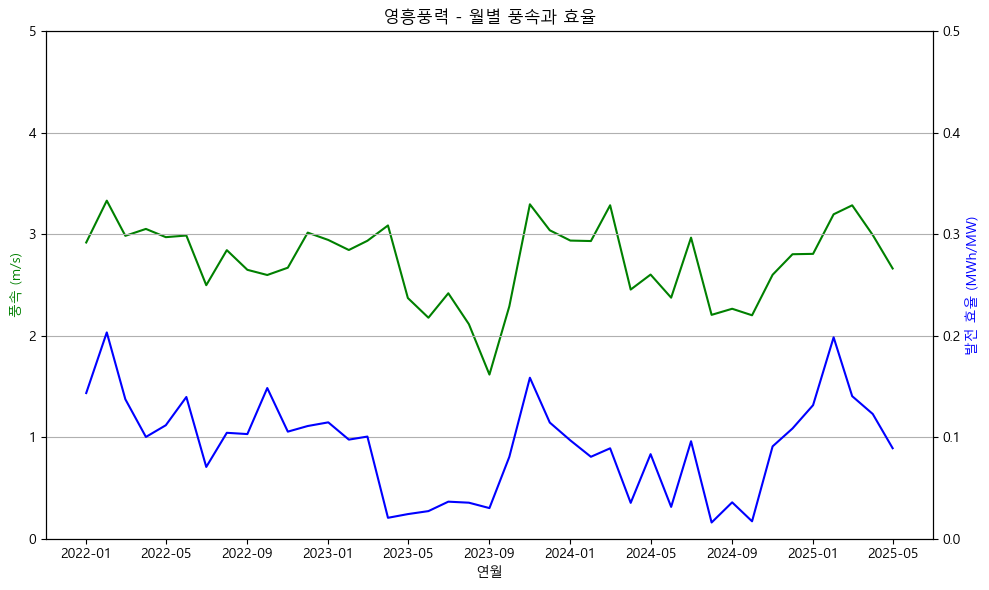

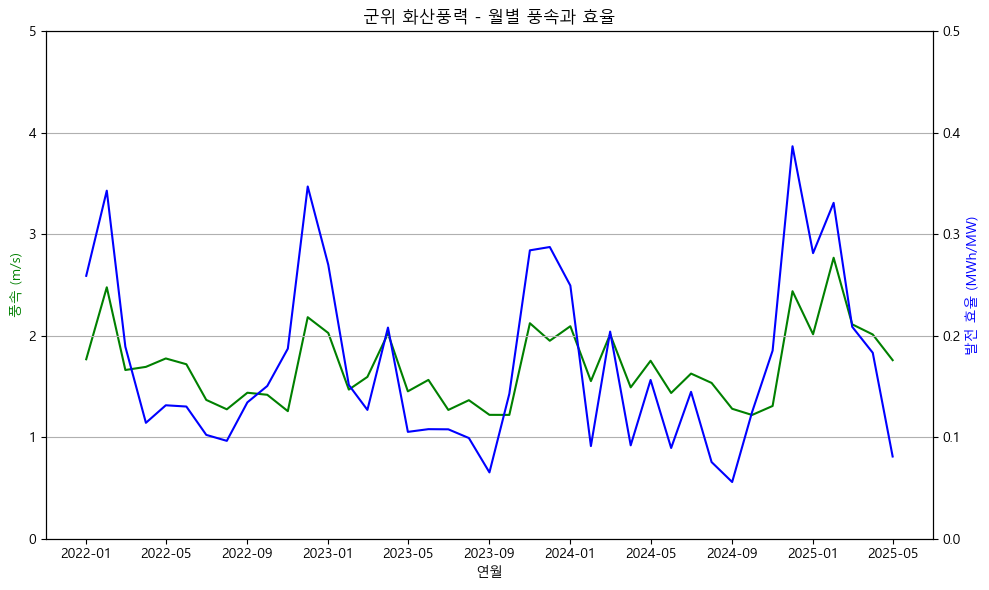

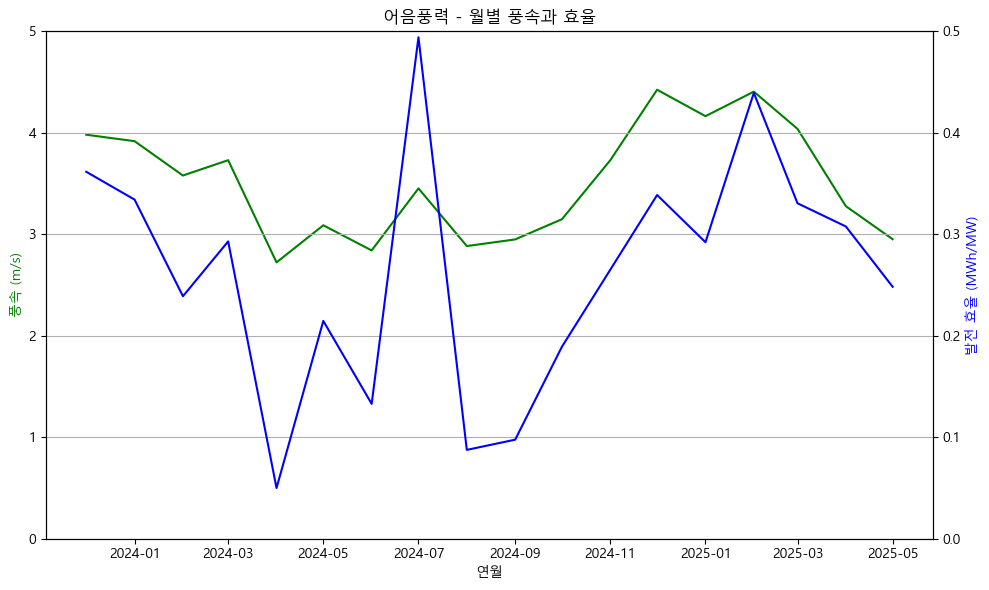

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ïó∞Ïõî Ï≤òÎ¶¨
df_merged['ÏùºÏûê'] = pd.to_datetime(df_merged['ÏùºÏûê'], errors='coerce')
df_merged['Ïó∞Ïõî'] = df_merged['ÏùºÏûê'].dt.to_period('M').astype(str)
df_merged['Ìö®Ïú®'] = df_merged['Î∞úÏ†ÑÎüâ(kWh)'] / df_merged['ÏÑ§ÎπÑÏö©Îüâ(MW)'] / 1000  # ‚ö†Ô∏è 1000ÏúºÎ°ú ÎÇòÎàî
df_merged = df_merged.dropna(subset=['Ìö®Ïú®', 'ÌíçÏÜç(m/s)', 'Ïó∞Ïõî', 'Î∞úÏ†ÑÍµ¨Î∂Ñ'])

# Í≥†Ï†ïÎêú yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
ÌíçÏÜç_min, ÌíçÏÜç_max = 0, 5
Ìö®Ïú®_min, Ìö®Ïú®_max = 0, 0.5  # ‚ö†Ô∏è Ìö®Ïú® yÏ∂ïÎèÑ 0~5Î°ú Ï°∞Ï†ï

# Î∞úÏ†ÑÏÜå Î™©Î°ù
plants = df_merged['Î∞úÏ†ÑÍµ¨Î∂Ñ'].unique()

# 3. Î∞úÏ†ÑÏÜåÎ≥Ñ Í∑∏ÎûòÌîÑ
for plant in plants:
    sub = df_merged[df_merged['Î∞úÏ†ÑÍµ¨Î∂Ñ'] == plant]
    if sub.empty:
        continue

    monthly = sub.groupby('Ïó∞Ïõî')[['ÌíçÏÜç(m/s)', 'Ìö®Ïú®']].mean().reset_index()
    monthly['Ïó∞Ïõî'] = pd.to_datetime(monthly['Ïó∞Ïõî'])
    monthly = monthly.sort_values('Ïó∞Ïõî')

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax2 = ax1.twinx()

    ax1.plot(monthly['Ïó∞Ïõî'], monthly['ÌíçÏÜç(m/s)'], 'g-', label='ÌíçÏÜç (m/s)')
    ax2.plot(monthly['Ïó∞Ïõî'], monthly['Ìö®Ïú®'], 'b-', label='Î∞úÏ†Ñ Ìö®Ïú® (MWh/MW)')

    ax1.set_xlabel('Ïó∞Ïõî')
    ax1.set_ylabel('ÌíçÏÜç (m/s)', color='g')
    ax2.set_ylabel('Î∞úÏ†Ñ Ìö®Ïú® (MWh/MW)', color='b')  # Îã®ÏúÑÎèÑ Î∞òÏòÅ

    ax1.set_ylim(ÌíçÏÜç_min, ÌíçÏÜç_max)
    ax2.set_ylim(Ìö®Ïú®_min, Ìö®Ïú®_max)

    plt.title(f'{plant} - ÏõîÎ≥Ñ ÌíçÏÜçÍ≥º Ìö®Ïú®')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()
